# MSc in Data Science 
# Machine Learning 
# Academic Year: 2017-2018

## Red wines dataset

Here we are going to follow the same steps we followed for the white wine dataset to also draw some conclusions about the red wine dataset.

In [1]:
import sys
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz


We load the data from the appropriate url and print the first and the last ten instances, so as to look at the rows and columns and the values of the "cells". We observe here that there are 12 features of which the 12th is the quality, thus the target feature. We also notice that the values are not scaled, which means that there are values that have a large discrepancy between them. 

In [2]:
balance_data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ";", header = 0)
balance_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
balance_data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


We print the shape of the data (vector) to know with how many instances we are working with. The instances here are 1599, so the dataset is smaller than the one with the white wines.

In [4]:
balance_data.shape

(1599, 12)

In [5]:
balance_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Then we want to know how many wines belong to each target value, thus to each quality. The goal is to know if there are some classes that have many more wines than others. This will probably create a problem in the application of some machine learning algorithms. Here, we observe that about the same amount of wines belong to classes 5 and 6. A smaller amount of them belong to class 7 all the other classes have significantly smaller amounts, with classes 1, 2, 9 and 10 having zero wines belonging to them. This is a sign that there might be a problem if we want to apply algorithms, that require tha data to be somehow evenly distributed.

In [6]:
balance_data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

The following step is to display some descriptive statistics, such as the minimum/maximum values, the average and the standard deviation of the features.

In [7]:
balance_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The correlation between the different features is very important, because there are algorithms that have as a bias the independence of the variables. We display a matrix and a heatmap that both show if there is such correlation. In the matrix, the closer the value between two features is to 1 the higher the correlation. The same applies to the heatmap, except for each value is assigned to a color, making it easier and faster to discover the correlations. Here, we observe that there aren't any significant correlations between any of the features.

In [8]:
balance_data.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


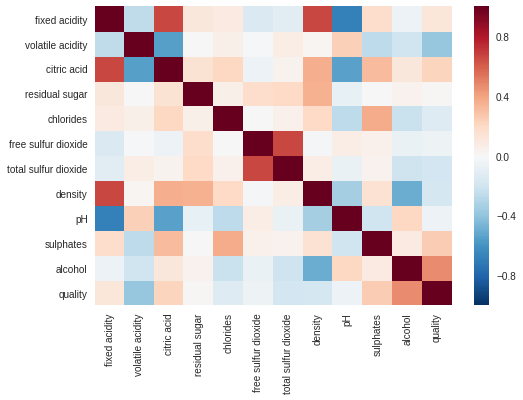

In [9]:
correlations = balance_data.corr()
sns.heatmap(correlations)
plt.show()

The next step is to identify if there are any outliers in the values of the features, something that could cause the algorithms to not behave as intended. If there are outliers, we have to consider removing them, BUT we have to be very careful and understand if the provided outlier is a value that is wrong or just a value that may appear in real life data of this type and is rather rare. Here, the features "chlorides" and "sulphates" seem to contain one or many outliers, but as we don't have deep knowledge of the characteristics of the features, we will not take action against them.

In [10]:
balance_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In the next six cells we display some plots that provide us with useful information about the dataset, such as histograms and density plots, which show us unobservable underlying probability density functions and box plots, that show us groups of the data through their quartiles. 

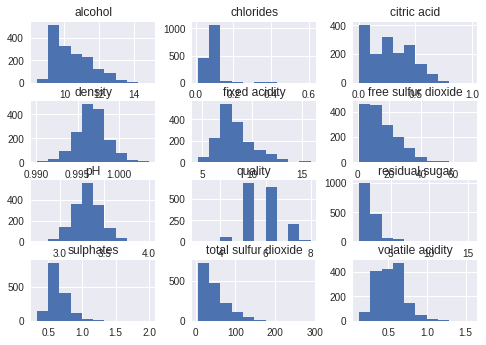

In [11]:
balance_data.hist()
plt.show()

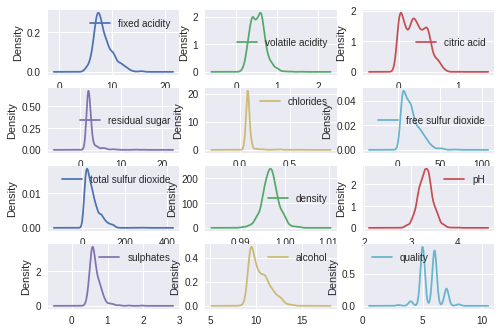

In [12]:
balance_data.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

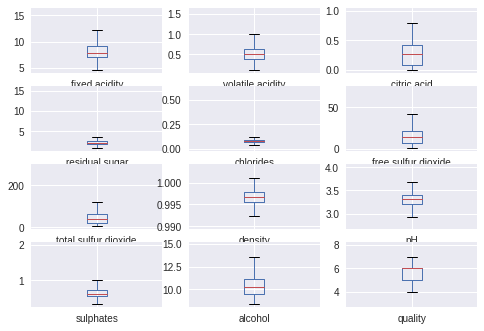

In [13]:
balance_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

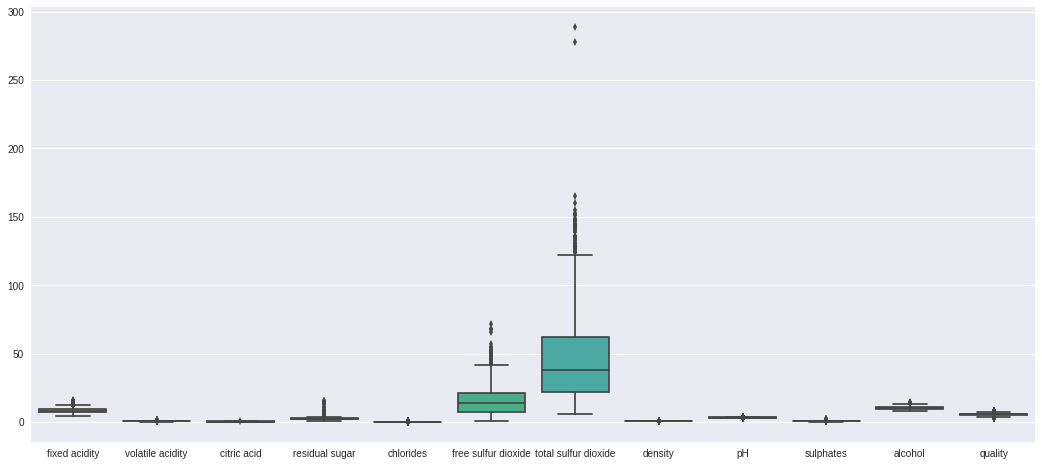

In [14]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=balance_data)
plt.show()

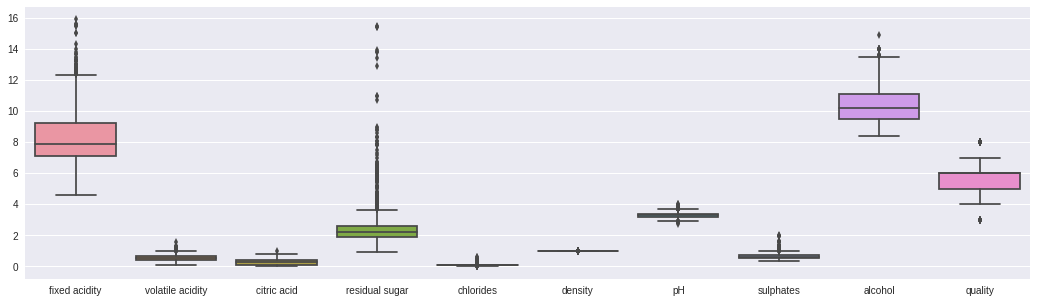

In [15]:
stats_balancedata = balance_data.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis=1)
plt.figure(figsize=(18,5))
sns.boxplot(data=stats_balancedata)
plt.show()

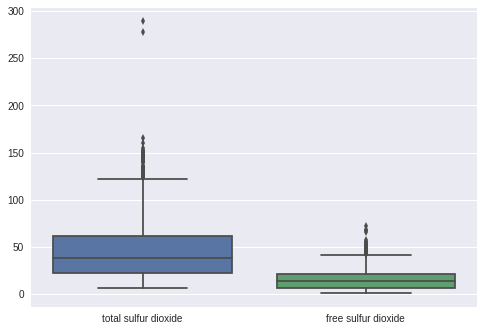

In [16]:
sulfur_balancedata = balance_data[['total sulfur dioxide', 'free sulfur dioxide']]
sulfur_balancedata.head()
sns.boxplot(data=sulfur_balancedata)
plt.show()